**PROJECT PROPOSAL**

**TITLE**

**INTRODUCTION**

Chronic Kidney disease has arose a lot of attention in recent years since more research indicate that Chronic kidney disease causes more threats to human health than we used to expect. It is a significant risk factor for a bunch of eating-related diseases, including eating disorder，vomiting. And It may also cause a lot of fatal disease like heart diseast, kidney failure etc. In our research, We want to know if does CDK patient are more vulnerable than people who do not have CDK in the asepect of albumin level, since albumin is essensial for regulate the oncotic pressure, immune system, coagulation and anticoagulant. In this report, we will use a patient health condition dataset as our research base and programming language R as a tool for our analysis.

Our dataset comes form UCI machine Learning Repositiry contributed by Dr.P.Soundarapandian.M.D.,D.M (Senior Consultant Nephrologist), Apollo Hospitals. This data contains 400 observations of patients with/without CDK. They monitored 24 different health feature. We are focus on specificly on albumin level(some other health condition may take into consideration later).  A healthy normal person has a average of 3.4 to 5.4 albumin level. Patients with CDK are likely to have lower albumin level due to kidney malfunction.

Using this data set and our preliminary analysis, the question we want to ask is **“Can we reliably claim that people with chronic kidney disease have lower level of albumin as people without chronic kidney disease?”**

**PRELIMINARY RESULTS**

In [2]:
library(tidyverse)
library(repr)
library(digest)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
#Question: do ckd patients have the same level of albumin as non-ckd patients?

#Patients without ckd could have other diseases - maybe diseases which actually affects the liver
#See if ckd has the same affect on albumin as other potential diseases
#does not say if ckd patients stictly have ckd
#An observation which pertains to this sample (maybe)


#reading the data
dataset <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00624/ckd-dataset-v2.csv", skip = 2) 

#wrangling data
ckd_data <- dataset %>%
    rename(albumin_level = X.3, classification = X.4, appetite = X.22)%>% #renaming columns
    mutate(albumin_level= str_replace_all(albumin_level, c("< 0" = "0", "1 - 1" = "1", "2 - 2" = "2", "3 - 3" = "3", "≥ 4" = "4")))%>% #turning strs into numbers    mutate(albumin_level = as.numeric(albumin_level))%>%
    select(albumin_level, classification, appetite)%>% #selecting relevant variables
    mutate(albumin_level = as.numeric(albumin_level))%>%#change chr into dbl for albumin_level
    mutate(appetite = as.factor(appetite)) #appetite may be another interesting variable to look at - even if not included in the final results
    

head(ckd_data)

# plot <- x_bar %>%
#     ggplot(aes(x = mean, y = classification))+
#     geom_histogram()

# plot


#to do:
#clean things up 
#select relevant data
#Demonstrate sample size
#Maybe look at appetite & albumin?
#put in notes the assumptions of data (greatest benefit of doubt)

#notes:
#Albumin may be decreased by malnutrition
#CKD may decrease appetite
#further questions = cause and consequence between CKD and appetite, further cause and consequence between appetite
#and albumin
#since the data is found in patients - notckd could mean the patient has other diseases
#The albumin level should be treated as ordinal data
#original data unreadable - substituted data
#

#x.3 = albumin, x.4 = class

,albumin_level,classification,appetite
,<dbl>,<chr>,<fct>
1,1,ckd,0
2,0,ckd,0
3,4,ckd,1
4,3,ckd,0
5,0,ckd,1
6,0,notckd,0


In [5]:
#for the sake of interest - look at the sum of albumin level in respect to appetite
#1 for presence of appetite, 0 for no appetite
appetite <- ckd_data %>%
    select(appetite, albumin_level)%>%
    group_by(appetite)%>%
    summarize(sum = sum(albumin_level))

head(appetite)


appetite,sum
<fct>,<dbl>
0,125
1,71


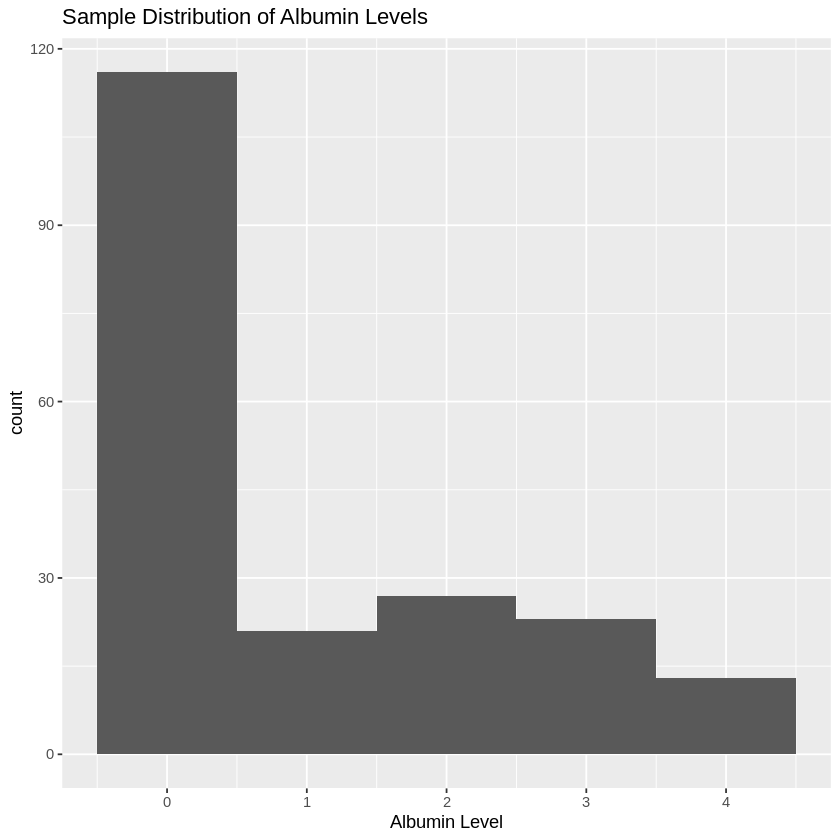

In [6]:
#plotting the sample distribution for albumin
albumin_plot <- ckd_data %>%
    ggplot(aes(x = albumin_level))+
    geom_histogram(bins = 5)+
    xlab("Albumin Level")+
    ggtitle("Sample Distribution of Albumin Levels")

albumin_plot

In [7]:
#computing point estimates(mean)
xbar <- ckd_data %>%
    select(classification, albumin_level)%>%
    group_by(classification)%>%
    summarize(mean = mean(albumin_level))

xbar

classification,mean
<chr>,<dbl>
ckd,1.53125
notckd,0.00000


In [13]:
#computing observed test statistic (difference in mean)
diff <- xbar%>%
    mutate(diff = mean[1] - mean[2])%>%
    select(diff)%>%
    head(1)%>%
    pull()

diff

[1] 1.53125

**METHOD:PLAN**

**REFERENCES**

ae